# **PREVIOUS**

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
import math

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.preprocessing import RobustScaler

In [ ]:
#importing warnings to ignore filter warnings
import warnings

warnings.filterwarnings('ignore')

## **Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read and load data 'previous_application.csv'

prev_app_data = pd.read_csv('/content/drive/MyDrive/1 66/Big Data/Project/DATA/previous_application.csv')
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis (EDA)**

In [ ]:
#Checking shape and size of previous_application.csv
prev_app_data.shape

(1670214, 37)

In [ ]:
#Checking stastical date of previous_application.csv

prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
# some columns have negative age details in days, we will need to convert them into Years data type
# We will use user defined function for this

def convert_to_years(value):
    return abs(value//365)
prev_app_data['YEARS_DECISION']= prev_app_data['DAYS_DECISION'].apply(convert_to_years)
prev_app_data['YEARS_FIRST_DRAWING']= prev_app_data['DAYS_FIRST_DRAWING'].apply(convert_to_years)
prev_app_data['YEARS_FIRST_DUE']= prev_app_data['DAYS_FIRST_DUE'].apply(convert_to_years)
prev_app_data['YEARS_LAST_DUE_1ST_VERSION']= prev_app_data['DAYS_LAST_DUE_1ST_VERSION'].apply(convert_to_years)
prev_app_data['YEARS_LAST_DUE']= prev_app_data['DAYS_LAST_DUE'].apply(convert_to_years)
prev_app_data['YEARS_TERMINATION']= prev_app_data['DAYS_TERMINATION'].apply(convert_to_years)


In [ ]:
unwanted= ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION','NAME_TYPE_SUITE']
prev_app_data.drop(labels= unwanted, axis= 1, inplace= True)

In [ ]:
prev_app_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,YEARS_DECISION,YEARS_FIRST_DRAWING,YEARS_FIRST_DUE,YEARS_LAST_DUE_1ST_VERSION,YEARS_LAST_DUE,YEARS_TERMINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,0.0,1,1000.0,1.0,0.0,1.0,1.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,1.0,1,1000.0,1.0,2.0,1000.0,1000.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,1.0,1,1000.0,1.0,0.0,1000.0,1000.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,1.0,2,1000.0,2.0,1.0,1.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,30.0,low_normal,POS industry with interest,0.0,2,1000.0,2.0,0.0,1.0,1.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,12.0,middle,POS industry with interest,0.0,5,1000.0,5.0,4.0,4.0,4.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,10.0,low_normal,POS household with interest,0.0,5,1000.0,4.0,4.0,4.0,4.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,12.0,low_normal,Cash X-Sell: low,1.0,4,1000.0,4.0,3.0,3.0,3.0


## **NULL**

In [ ]:
prev_app_data.isnull().sum()/len(prev_app_data)*100
(prev_app_data.isnull().sum()/len(prev_app_data)*100).sort_values(ascending= False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
YEARS_TERMINATION              40.298129
YEARS_FIRST_DRAWING            40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
YEARS_FIRST_DUE                40.298129
YEARS_LAST_DUE_1ST_VERSION     40.298129
YEARS_LAST_DUE                 40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
YEARS_DECISION                  0.000000
NAME_YIELD_GROUP                0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SK_ID_PREV                      0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [ ]:
def meta_data(data):
    # สร้าง DataFrame เพื่อเก็บคุณสมบัติและลักษณะของข้อมูล
    data_info = pd.DataFrame(data.dtypes, columns=['Data_Type'])
    data_info['Unique'] = data.nunique()
    data_info['Missing_Values'] = data.isnull().sum()
    data_info['Percent_Null'] = (data_info['Missing_Values'] / len(data)) * 100
    data_info = data_info.sort_values(by='Percent_Null', ascending=False)

    return data_info

In [ ]:
prev_meta_data=meta_data(prev_app_data)
prev_meta_data.reset_index(drop=False).head(20)

,index,Data_Type,Unique,Missing_Values,Percent_Null
0,RATE_INTEREST_PRIVILEGED,float64,25,1664263,99.643698
1,RATE_INTEREST_PRIMARY,float64,148,1664263,99.643698
2,RATE_DOWN_PAYMENT,float64,207033,895844,53.636480
3,AMT_DOWN_PAYMENT,float64,29278,895844,53.636480
4,YEARS_TERMINATION,float64,9,673065,40.298129
5,YEARS_FIRST_DRAWING,float64,10,673065,40.298129
6,NFLAG_INSURED_ON_APPROVAL,float64,2,673065,40.298129
7,YEARS_FIRST_DUE,float64,9,673065,40.298129
8,YEARS_LAST_DUE_1ST_VERSION,float64,10,673065,40.298129
9,YEARS_LAST_DUE,float64,9,673065,40.298129


In [ ]:
# removing columns where null values are more than 20%

prev_app_data_no_null = prev_app_data.loc[ : ,(prev_app_data.isnull().sum()/len(prev_app_data)*100 <20)]
prev_app_data_no_null.shape

(1670214, 23)

In [ ]:
prev_meta_data=meta_data(prev_app_data_no_null)
prev_meta_data.reset_index(drop=False).head(20)

,index,Data_Type,Unique,Missing_Values,Percent_Null
0,PRODUCT_COMBINATION,object,17,346,0.020716
1,AMT_CREDIT,float64,86803,1,0.000060
2,SK_ID_PREV,int64,1670214,0,0.000000
3,CODE_REJECT_REASON,object,9,0,0.000000
4,NAME_YIELD_GROUP,object,5,0,0.000000
5,NAME_SELLER_INDUSTRY,object,11,0,0.000000
6,SELLERPLACE_AREA,int64,2097,0,0.000000
7,CHANNEL_TYPE,object,8,0,0.000000
8,NAME_PRODUCT_TYPE,object,3,0,0.000000
9,NAME_PORTFOLIO,object,5,0,0.000000


In [ ]:
prev_app_data_no_null = prev_app_data_no_null.dropna(subset=['PRODUCT_COMBINATION'])
prev_app_data_no_null = prev_app_data_no_null.dropna(subset=['AMT_CREDIT'])

In [ ]:
prev_meta_data=meta_data(prev_app_data_no_null)
prev_meta_data.reset_index(drop=False).head(20)

,index,Data_Type,Unique,Missing_Values,Percent_Null
0,SK_ID_PREV,int64,1669867,0,0.0
1,CODE_REJECT_REASON,object,9,0,0.0
2,PRODUCT_COMBINATION,object,17,0,0.0
3,NAME_YIELD_GROUP,object,5,0,0.0
4,NAME_SELLER_INDUSTRY,object,11,0,0.0
5,SELLERPLACE_AREA,int64,2097,0,0.0
6,CHANNEL_TYPE,object,8,0,0.0
7,NAME_PRODUCT_TYPE,object,3,0,0.0
8,NAME_PORTFOLIO,object,5,0,0.0
9,NAME_GOODS_CATEGORY,object,28,0,0.0


In [ ]:
prev_app_data_no_null.shape

(1669867, 23)

In [ ]:
prev_app_data_no_null_fordummy = prev_app_data_no_null.copy()

In [ ]:
df = pd.DataFrame(prev_app_data_no_null_fordummy)

# สร้าง Dictionary ที่จับคู่ข้อความกับเลข
mapping = {}
for col in df.columns:
    if df[col].dtype == 'object':  # ตรวจสอบว่าคอลัมน์นั้นเป็นข้อความหรือไม่
        unique_values = df[col].unique()
        mapping[col] = {val: idx+1 for idx, val in enumerate(unique_values)}

        # ใช้ mapping เพื่อแปลงข้อความเป็นเลข
        df[col].replace(mapping[col], inplace=True)
prev_app_data_no_null_fordummy

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION
0,2030495,271877,1,17145.0,17145.0,1,15,1,1,1,...,1,1,1,1,1,35,1,1,1,1
1,2802425,108129,2,607500.0,679671.0,2,11,1,1,2,...,1,2,2,2,2,-1,2,2,2,1
2,2523466,122040,2,112500.0,136444.5,3,11,1,1,2,...,1,2,2,2,3,-1,2,3,3,1
3,2819243,176158,2,450000.0,470790.0,4,7,1,1,2,...,1,2,2,2,3,-1,2,1,4,2
4,1784265,202054,2,337500.0,404055.0,2,9,1,1,3,...,1,2,2,3,3,-1,2,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,1,267295.5,311400.0,7,12,1,1,1,...,3,11,1,1,4,43,6,4,13,2
1670210,2357031,334635,1,87750.0,64291.5,3,15,1,1,1,...,2,11,1,1,4,43,6,1,13,5
1670211,2659632,249544,1,105237.0,102523.5,4,12,1,1,1,...,1,3,1,1,1,1370,3,4,8,5
1670212,2785582,400317,2,180000.0,191880.0,7,9,1,1,2,...,1,2,2,2,6,-1,2,4,2,4


In [ ]:
prev_app_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [ ]:
prev_app_data_no_null.corr()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,SELLERPLACE_AREA,YEARS_DECISION
SK_ID_PREV,1.000000,-0.000310,0.003303,0.003660,-0.002660,-0.002828,-0.001079,-0.018856
SK_ID_CURR,-0.000310,1.000000,0.000271,0.000185,0.002846,0.000099,0.001265,0.000671
AMT_APPLICATION,0.003303,0.000271,1.000000,0.975822,-0.014407,0.004317,-0.007654,-0.133770
AMT_CREDIT,0.003660,0.000185,0.975822,1.000000,-0.021030,-0.025172,-0.009573,-0.133909
HOUR_APPR_PROCESS_START,-0.002660,0.002846,-0.014407,-0.021030,1.000000,0.005789,0.015673,0.040101
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000099,0.004317,-0.025172,0.005789,1.000000,0.000913,-0.016357
SELLERPLACE_AREA,-0.001079,0.001265,-0.007654,-0.009573,0.015673,0.000913,1.000000,0.018418
YEARS_DECISION,-0.018856,0.000671,-0.133770,-0.133909,0.040101,-0.016357,0.018418,1.000000


In [ ]:
prev_app_data_no_null_fordummy.corr()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION
SK_ID_PREV,1.000000,-0.000310,0.022097,0.003303,0.003660,-0.000612,-0.002660,0.005346,-0.002828,0.010890,...,-0.012333,-0.015566,0.027244,0.003446,0.003719,-0.001079,-0.009962,0.022148,-0.000122,-0.018856
SK_ID_CURR,-0.000310,1.000000,0.000142,0.000271,0.000185,-0.000489,0.002846,0.000679,0.000099,0.000096,...,-0.001723,-0.000740,-0.000050,0.000290,0.000047,0.001265,-0.000768,0.000229,0.001205,0.000671
NAME_CONTRACT_TYPE,0.022097,0.000142,1.000000,0.135634,0.201668,0.004409,-0.116699,0.140703,-0.102774,0.199737,...,-0.245963,-0.448039,0.882908,0.599089,0.202696,-0.035875,-0.272665,0.452174,0.181482,-0.351958
AMT_APPLICATION,0.003303,0.000271,0.135634,1.000000,0.975822,0.002158,-0.014407,-0.007341,0.004317,0.236046,...,-0.070857,-0.063358,-0.036281,0.441753,0.120426,-0.007654,-0.006581,-0.175375,-0.049352,-0.133770
AMT_CREDIT,0.003660,0.000185,0.201668,0.975822,1.000000,0.001945,-0.021030,0.028196,-0.025172,0.240397,...,-0.084540,-0.091063,0.025077,0.482502,0.126873,-0.009573,-0.028739,-0.145034,-0.034854,-0.133909
WEEKDAY_APPR_PROCESS_START,-0.000612,-0.000489,0.004409,0.002158,0.001945,1.000000,0.016124,0.001172,-0.013493,0.001890,...,-0.000005,-0.003144,0.005802,0.000061,-0.000772,0.001016,-0.003985,0.006231,0.001576,-0.008074
HOUR_APPR_PROCESS_START,-0.002660,0.002846,-0.116699,-0.014407,-0.021030,0.016124,1.000000,-0.007573,0.005789,-0.057314,...,0.055867,0.062203,-0.091830,-0.072197,-0.122872,0.015673,0.002349,-0.036356,0.004415,0.040101
FLAG_LAST_APPL_PER_CONTRACT,0.005346,0.000679,0.140703,-0.007341,0.028196,0.001172,-0.007573,1.000000,-0.722084,-0.029771,...,-0.020958,-0.031633,0.144967,0.059812,0.023714,-0.001343,-0.017395,0.079880,0.067093,0.023260
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000099,-0.102774,0.004317,-0.025172,-0.013493,0.005789,-0.722084,1.000000,0.019749,...,0.014833,0.022569,-0.104389,-0.046818,-0.017091,0.000913,0.012148,-0.053503,-0.048300,-0.016357
NAME_CASH_LOAN_PURPOSE,0.010890,0.000096,0.199737,0.236046,0.240397,0.001890,-0.057314,-0.029771,0.019749,1.000000,...,-0.096121,-0.184740,0.113333,0.457205,0.117256,-0.017675,-0.132247,-0.032687,0.054357,-0.155312


In [ ]:
prev_app_data_no_null_fordummy = prev_app_data_no_null_fordummy.astype(float)

In [ ]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
prev_app_data_no_null_fordummy.select_dtypes('float').corr().style.applymap(color_)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION
SK_ID_PREV,1.000000,-0.000310,0.022097,0.003303,0.003660,-0.000612,-0.002660,0.005346,-0.002828,0.010890,0.042487,0.024953,0.019345,-0.012333,-0.015566,0.027244,0.003446,0.003719,-0.001079,-0.009962,0.022148,-0.000122,-0.018856
SK_ID_CURR,-0.000310,1.000000,0.000142,0.000271,0.000185,-0.000489,0.002846,0.000679,0.000099,0.000096,0.000957,0.001187,0.001857,-0.001723,-0.000740,-0.000050,0.000290,0.000047,0.001265,-0.000768,0.000229,0.001205,0.000671
NAME_CONTRACT_TYPE,0.022097,0.000142,1.000000,0.135634,0.201668,0.004409,-0.116699,0.140703,-0.102774,0.199737,0.324450,0.526555,0.027281,-0.245963,-0.448039,0.882908,0.599089,0.202696,-0.035875,-0.272665,0.452174,0.181482,-0.351958
AMT_APPLICATION,0.003303,0.000271,0.135634,1.000000,0.975822,0.002158,-0.014407,-0.007341,0.004317,0.236046,-0.143507,-0.223726,0.123976,-0.070857,-0.063358,-0.036281,0.441753,0.120426,-0.007654,-0.006581,-0.175375,-0.049352,-0.133770
AMT_CREDIT,0.003660,0.000185,0.201668,0.975822,1.000000,0.001945,-0.021030,0.028196,-0.025172,0.240397,-0.150569,-0.194726,0.125201,-0.084540,-0.091063,0.025077,0.482502,0.126873,-0.009573,-0.028739,-0.145034,-0.034854,-0.133909
WEEKDAY_APPR_PROCESS_START,-0.000612,-0.000489,0.004409,0.002158,0.001945,1.000000,0.016124,0.001172,-0.013493,0.001890,0.008149,0.005359,0.003198,-0.000005,-0.003144,0.005802,0.000061,-0.000772,0.001016,-0.003985,0.006231,0.001576,-0.008074
HOUR_APPR_PROCESS_START,-0.002660,0.002846,-0.116699,-0.014407,-0.021030,0.016124,1.000000,-0.007573,0.005789,-0.057314,-0.046470,-0.097060,0.017610,0.055867,0.062203,-0.091830,-0.072197,-0.122872,0.015673,0.002349,-0.036356,0.004415,0.040101
FLAG_LAST_APPL_PER_CONTRACT,0.005346,0.000679,0.140703,-0.007341,0.028196,0.001172,-0.007573,1.000000,-0.722084,-0.029771,0.033841,0.087284,0.146222,-0.020958,-0.031633,0.144967,0.059812,0.023714,-0.001343,-0.017395,0.079880,0.067093,0.023260
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000099,-0.102774,0.004317,-0.025172,-0.013493,0.005789,-0.722084,1.000000,0.019749,-0.019701,-0.060317,-0.111256,0.014833,0.022569,-0.104389,-0.046818,-0.017091,0.000913,0.012148,-0.053503,-0.048300,-0.016357
NAME_CASH_LOAN_PURPOSE,0.010890,0.000096,0.199737,0.236046,0.240397,0.001890,-0.057314,-0.029771,0.019749,1.000000,0.118791,-0.039891,0.122237,-0.096121,-0.184740,0.113333,0.457205,0.117256,-0.017675,-0.132247,-0.032687,0.054357,-0.155312


## **Data Visualization**

In [ ]:
approved=prev_app_data_no_null[prev_app_data_no_null.NAME_CONTRACT_STATUS=='Approved']
refused=prev_app_data_no_null[prev_app_data_no_null.NAME_CONTRACT_STATUS=='Refused']
canceled=prev_app_data_no_null[prev_app_data_no_null.NAME_CONTRACT_STATUS=='Canceled']
unused=prev_app_data_no_null[prev_app_data_no_null.NAME_CONTRACT_STATUS=='Unused Offer']

In [ ]:
percentage_approved=(len(approved)*100)/len(prev_app_data_no_null)
percentage_refused=(len(refused)*100)/len(prev_app_data_no_null)
percentage_canceled=(len(canceled)*100)/len(prev_app_data_no_null)
percentage_unused=(len(unused)*100)/len(prev_app_data_no_null)

In [ ]:
print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.09 %
The Percentage of people whose loans have been Refused is: 17.41 %
The Percentage of people whose loans have been Canceled is: 18.92 %
The Percentage of people whose loans have been Unused is: 0.0 %


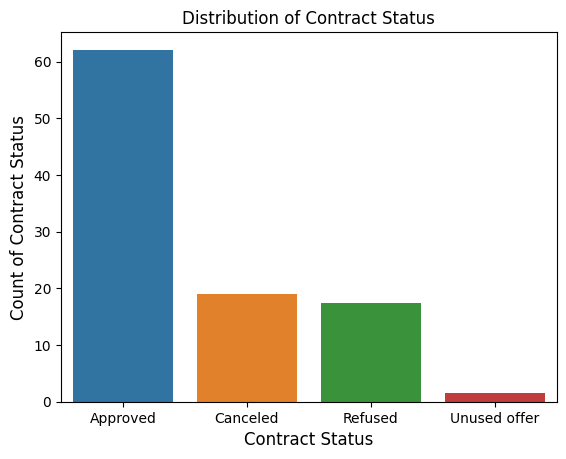

In [ ]:
sns.barplot(x=prev_app_data_no_null[prev_app_data_no_null.NAME_CONTRACT_STATUS!='XNA'].NAME_CONTRACT_STATUS.value_counts().index,y=100*prev_app_data_no_null[prev_app_data_no_null.NAME_CONTRACT_STATUS!='XNA'].NAME_CONTRACT_STATUS.value_counts(normalize=True))
plt.xlabel("Contract Status", fontsize=12)
plt.ylabel("Count of Contract Status", fontsize=12)
plt.title("Distribution of Contract Status")
plt.show()

In [ ]:
prev_app_data_no_null.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))

    s1=sns.countplot(ax=ax1,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    ax1.set_title("Approved", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

    s2=sns.countplot(ax=ax2,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Refused", fontsize=10)


    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [ ]:
"""
def plot_4charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15,30))

    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)


    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)

    s4=sns.countplot(ax=ax4,x=unused[var], data=unused, order= unused[var].value_counts().index,)
    if(label_rotation):
        s4.set_xticklabels(s4.get_xticklabels(),rotation=90)
    ax4.set_xlabel('%s' %var)
    ax4.set_ylabel("Count of Loans")
    ax4.set_title("Unused", fontsize=10)
    plt.show()
    """

'\ndef plot_4charts(var, label_rotation,horizontal_layout):\n    if(horizontal_layout):\n        fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))\n    else:\n        fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15,30))\n\n    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)\n    ax1.set_title("Refused", fontsize=10)\n    ax1.set_xlabel(\'%s\' %var)\n    ax1.set_ylabel("Count of Loans")\n    if(label_rotation):\n        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)\n\n    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)\n    if(label_rotation):\n        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)\n    ax2.set_xlabel(\'%s\' %var)\n    ax2.set_ylabel("Count of Loans")\n    ax2.set_title("Approved", fontsize=10)\n\n\n    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)\n    ax3.set_title("Cancele

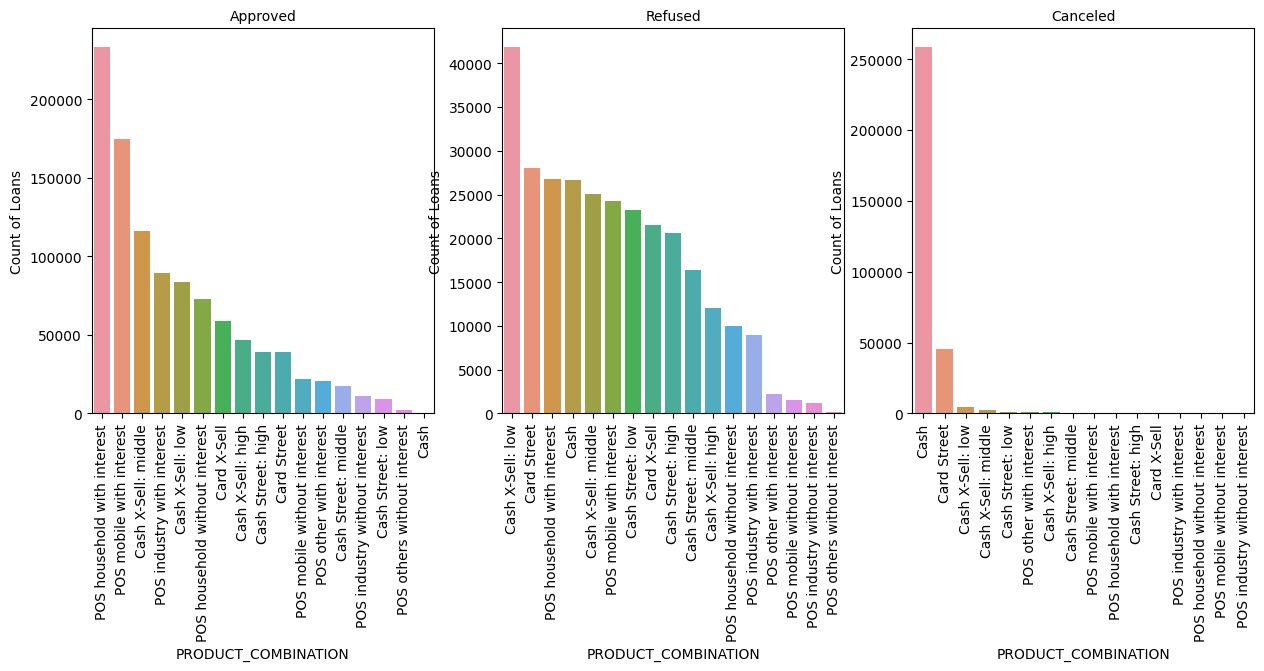

In [ ]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

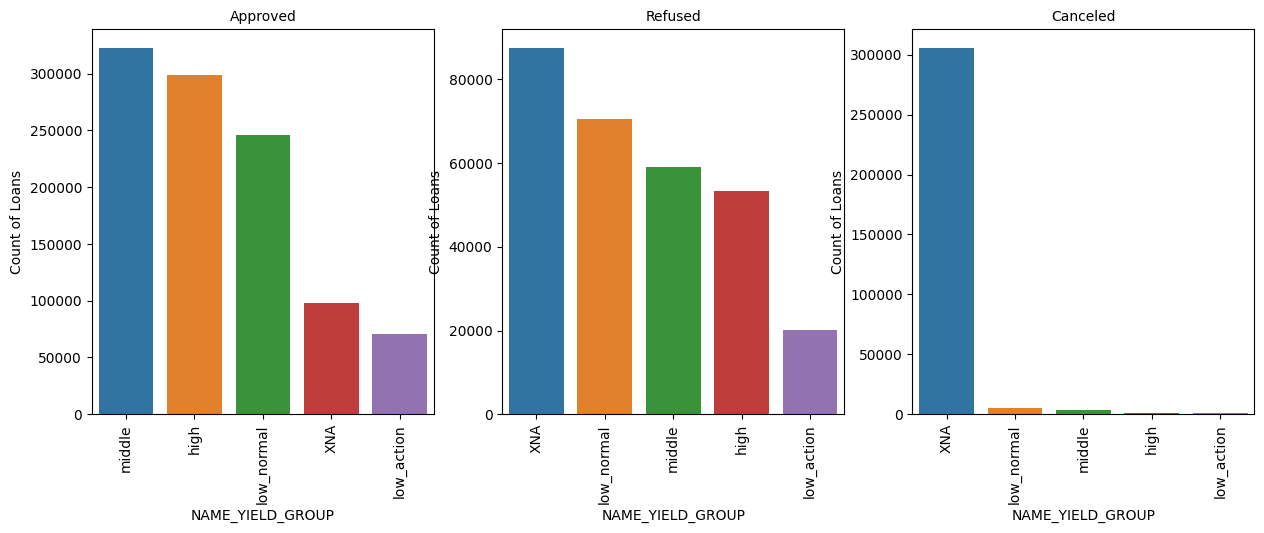

In [ ]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

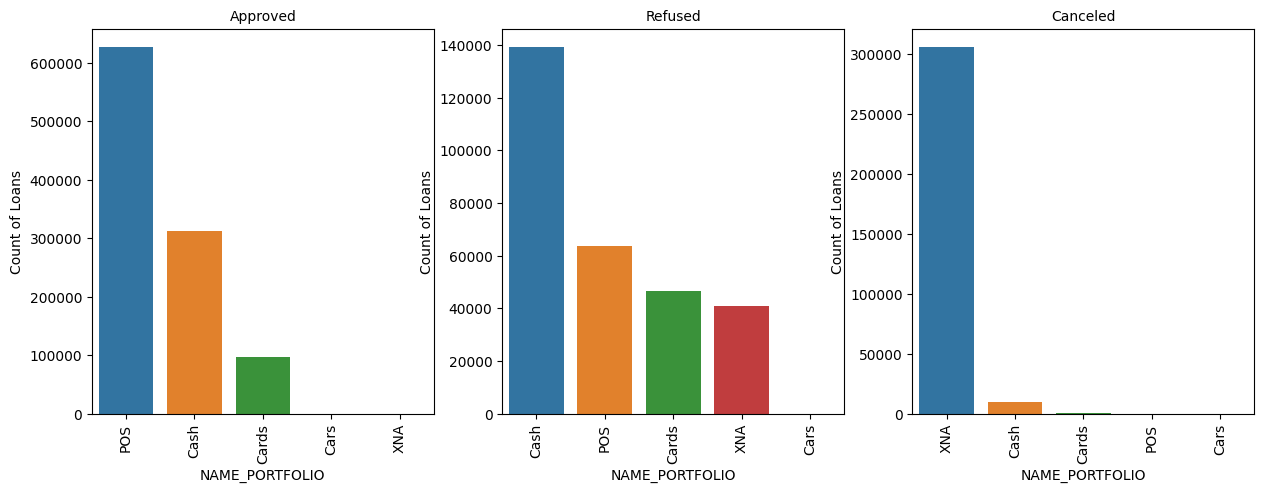

In [ ]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

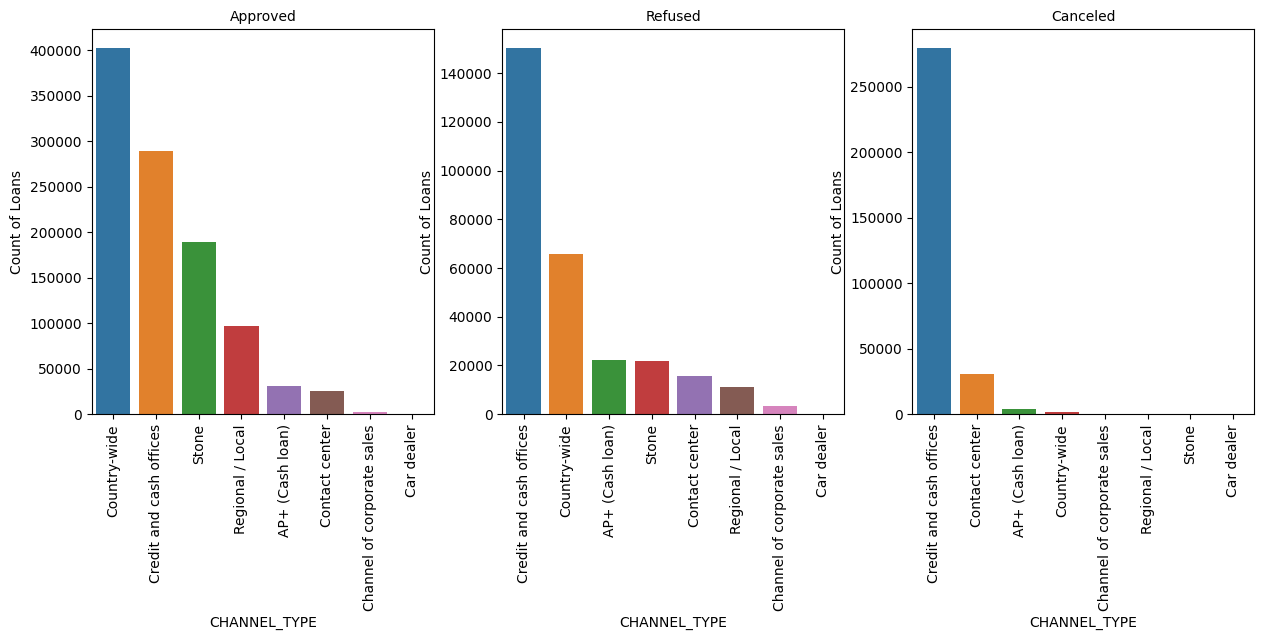

In [ ]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

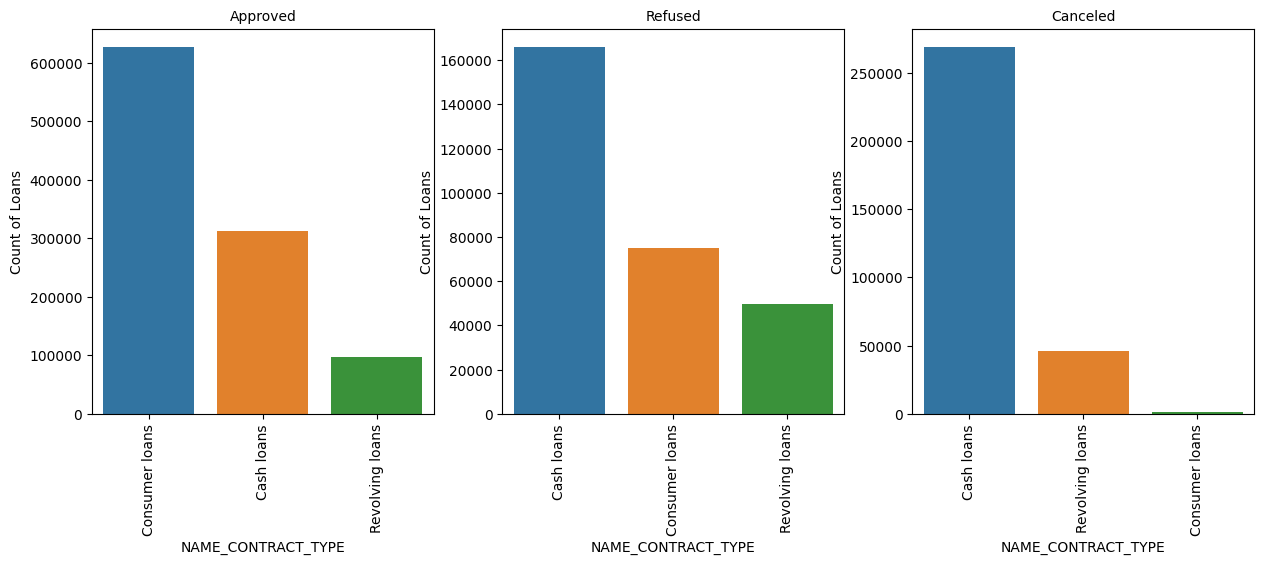

In [ ]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

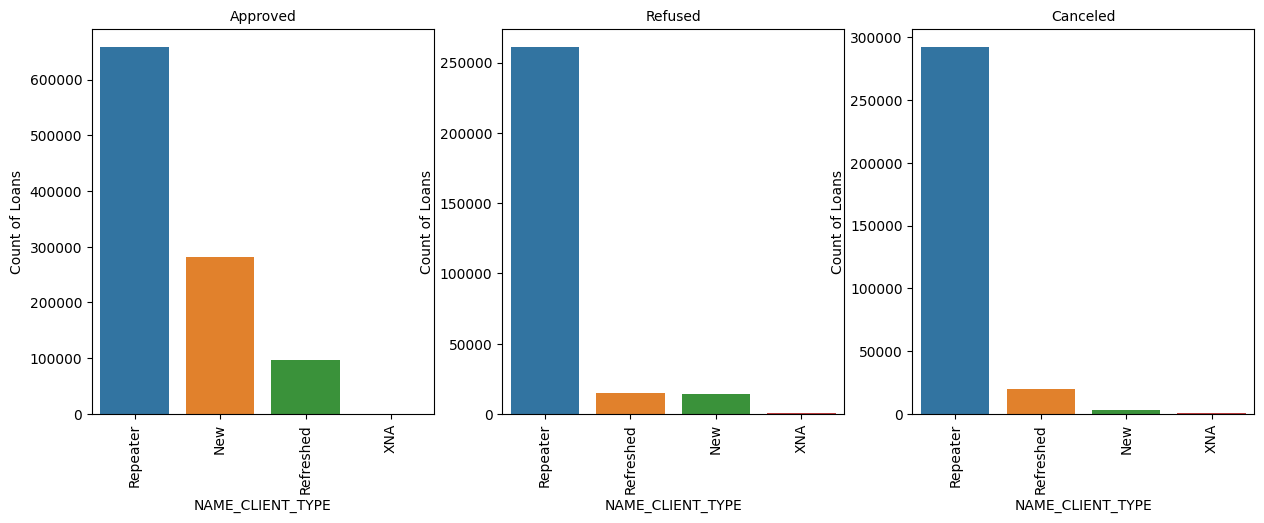

In [ ]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

# **MERGE**

## **Import Data**

In [ ]:
# Read and load data 'previous_application.csv'

app_data = pd.read_csv('/content/drive/MyDrive/1 66/Big Data/Project/DATA/application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## **MERGE**

>**Application Data + Previous Application Data**



In [ ]:
merge_app = app_data.merge(prev_app_data, on = 'SK_ID_CURR', how = 'inner')
merge_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,YEARS_DECISION,YEARS_FIRST_DRAWING,YEARS_FIRST_DUE,YEARS_LAST_DUE_1ST_VERSION,YEARS_LAST_DUE,YEARS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,0.0,2,1000.0,2.0,0.0,1.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,low_normal,Cash X-Sell: low,1.0,3,1000.0,2.0,2.0,2.0,2.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,6.0,middle,POS industry with interest,0.0,3,1000.0,3.0,2.0,2.0,2.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,1.0,7,1000.0,7.0,6.0,6.0,6.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,0.0,3,1000.0,3.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,24.0,middle,Cash X-Sell: middle,1.0,2,1000.0,2.0,0.0,2.0,2.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0.0,XNA,Card Street,NaN,2,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,60.0,low_normal,Cash Street: low,NaN,1,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,36.0,low_normal,Cash X-Sell: low,0.0,3,1000.0,3.0,0.0,1.0,1.0


## **Exploratory Data Analysis (EDA)**

In [ ]:
merge_app.shape

(1413701, 157)

In [ ]:
#To view all 157 columns

pd.set_option('display.max_columns', 157)
merge_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,YEARS_DECISION,YEARS_FIRST_DRAWING,YEARS_FIRST_DUE,YEARS_LAST_DUE_1ST_VERSION,YEARS_LAST_DUE,YEARS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,0.0,2,1000.0,2.0,0.0,1.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,

In [ ]:
# some columns have negative age details in days, we will need to convert them into Years data type
# We will use user defined function for this

def convert_to_years(value):
    return abs(value//365)
merge_app['YEARS_LAST_DUE_1ST_VERSION']= merge_app['DAYS_LAST_DUE_1ST_VERSION'].apply(convert_to_years)
merge_app['YEARS_LAST_DUE']= merge_app['DAYS_LAST_DUE'].apply(convert_to_years)
merge_app['YEARS_TERMINATION']= merge_app['DAYS_TERMINATION'].apply(convert_to_years)
merge_app['YEARS_BIRTH']= merge_app['DAYS_BIRTH'].apply(convert_to_years)
merge_app['YEARS_EMPLOYED']= merge_app['DAYS_EMPLOYED'].apply(convert_to_years)
merge_app['YEARS_REGISTRATION']= merge_app['DAYS_REGISTRATION'].apply(convert_to_years)
merge_app['YEARS_ID_PUBLISH']=merge_app['DAYS_ID_PUBLISH'].apply(convert_to_years)
merge_app['YEARS_LAST_PHONE_CHANGE']= merge_app['DAYS_LAST_PHONE_CHANGE'].apply(convert_to_years)

In [ ]:
# Removing the DAYs columns
merge_app.drop(merge_app.loc[ : , 'DAYS_BIRTH':'DAYS_ID_PUBLISH'], axis= 1, inplace=True)
merge_app.drop(merge_app.loc[ : ,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'], axis= 1, inplace=True)

In [ ]:
unwanted= ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'EXT_SOURCE_3']
merge_app.drop(labels= unwanted, axis= 1, inplace= True)

In [ ]:
merge_app.shape

(1413387, 120)

In [ ]:
# DAYS_EMPLOYED- max need to be changed

merge_app.YEARS_EMPLOYED.value_counts()

In [ ]:
# 55374 number of applicates say they are employed for 1000 years, investigating deeper

merge_app[merge_app.YEARS_EMPLOYED == 1000].NAME_INCOME_TYPE.value_counts()

In [ ]:
#Observation:-

#so pensioners and unemployed have entered incorrect data of 1000 years of employment
# For correct data analysis, this need to be replaced by NAN/ null

merge_app.loc[merge_app.YEARS_EMPLOYED == 1000, 'YEARS_EMPLOYED']= np.NAN

In [ ]:
#Checking if this worked

merge_app.YEARS_EMPLOYED.value_counts()

## **NULL**

In [ ]:
merge_app.isnull().sum()/len(merge_app)*100
(merge_app.isnull().sum()/len(merge_app)*100).sort_values(ascending= False)

COMMONAREA_AVG                 69.688698
COMMONAREA_MEDI                69.688698
COMMONAREA_MODE                69.688698
NONLIVINGAPARTMENTS_MODE       69.295883
NONLIVINGAPARTMENTS_MEDI       69.295883
                                 ...    
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
YEARS_DECISION                  0.000000
Length: 120, dtype: float64

In [ ]:
def meta_data(data):
    # สร้าง DataFrame เพื่อเก็บคุณสมบัติและลักษณะของข้อมูล
    data_info = pd.DataFrame(data.dtypes, columns=['Data_Type'])
    data_info['Unique'] = data.nunique()
    data_info['Missing_Values'] = data.isnull().sum()
    data_info['Percent_Null'] = (data_info['Missing_Values'] / len(data)) * 100
    data_info = data_info.sort_values(by='Percent_Null', ascending=False)

    return data_info

In [ ]:
merge_app=meta_data(prev_app_data)
merge_app.reset_index(drop=False).head(20)

,index,Data_Type,Unique,Missing_Values,Percent_Null
0,RATE_INTEREST_PRIVILEGED,float64,25,1664263,99.643698
1,RATE_INTEREST_PRIMARY,float64,148,1664263,99.643698
2,RATE_DOWN_PAYMENT,float64,207033,895844,53.636480
3,AMT_DOWN_PAYMENT,float64,29278,895844,53.636480
4,YEARS_TERMINATION,float64,9,673065,40.298129
5,YEARS_FIRST_DRAWING,float64,10,673065,40.298129
6,NFLAG_INSURED_ON_APPROVAL,float64,2,673065,40.298129
7,YEARS_FIRST_DUE,float64,9,673065,40.298129
8,YEARS_LAST_DUE_1ST_VERSION,float64,10,673065,40.298129
9,YEARS_LAST_DUE,float64,9,673065,40.298129


In [ ]:
# removing columns where null values are more than 30%

merge_app_clean = merge_app.loc[ : ,(merge_app.isnull().sum()/len(prev_app_data)*100 <20)]
merge_app_clean.shape

(36, 4)

In [ ]:
# adding OCCUPATION_TYPE and TOTALAREA_MODE back

merge_app_clean['OCCUPATION_TYPE'] = merge_app['OCCUPATION_TYPE']
merge_app_clean['TOTALAREA_MODE'] = merge_app['TOTALAREA_MODE']
merge_app_clean.shape

## **Data Visualization**

In [ ]:
approved= merge_app[merge_app['NAME_CONTRACT_STATUS']=='Approved']
refused = merge_app[merge_app['NAME_CONTRACT_STATUS']=='Refused']
canceled = merge_app[merge_app['NAME_CONTRACT_STATUS']=='Canceled']
unused = merge_app[merge_app['NAME_CONTRACT_STATUS']=='Unused offer']

In [ ]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))

    s1=sns.countplot(ax=ax1,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    ax1.set_title("Approved", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

    s2=sns.countplot(ax=ax2,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Refused", fontsize=10)


    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [ ]:
'''def plot_4charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,30))
    else:
        fig,((ax1, ax2), (ax3, ax4))  = plt.subplots(nrows=2,ncols=2, figsize=(15,30))

    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)


    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)

    s4=sns.countplot(ax=ax4,x=unused[var], data=unused, order= unused[var].value_counts().index,)
    if(label_rotation):
        s4.set_xticklabels(s4.get_xticklabels(),rotation=90)
    ax4.set_xlabel('%s' %var)
    ax4.set_ylabel("Count of Loans")
    ax4.set_title("Unused", fontsize=10)
    plt.show()'''

In [ ]:
plot_3charts('NAME_CONTRACT_TYPEx', label_rotation=True,horizontal_layout=True)

In [ ]:
plot_3charts('CODE_GENDER', label_rotation=True,horizontal_layout=True)

In [ ]:
plot_3charts('FLAG_OWN_CAR', label_rotation=True,horizontal_layout=True)

In [ ]:
plot_3charts('TARGET', label_rotation=True,horizontal_layout=True)

In [ ]:
plot_3charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

In [ ]:
plot_3charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

In [ ]:
plot_3charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

In [ ]:
plot_3charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)